# Non linear regression illustrated with quadratic equation

Illustrate non-linear regression for a simple quadratic model.
This can be solved using linear regression as well by considering the
squared term as a separate term, but we choose to consider it as a
non-linear model to illustrate.

In [1]:
# Import necessary libraries.
from ml_uncertainty.non_linear_regression import NonLinearRegression
from ml_uncertainty.model_inference import ParametricModelInference
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)


# Say we have a model of the form.
def model(X, params):
    r"""Model of the form: $ y = \beta_0 + \beta_1 X + \beta_2 X^2 $

    Parameters:
    -----------
    X: numpy array of dimensions (m, 1) where m is the number of samples.
    params: numpy vector of dimensions (3,) consisting the $\beta$ values.

    Returns:
    --------
    y: numpy vector of dimensions (m,) where m is the number of examples.
    """

    return params[0] + X[:, 0] * params[1] + X[:, 0] ** 2 * params[2]


# Generate X and y data.
# X_expt = np.linspace(0, 10, 100).reshape((-1, 1))
X_expt = np.linspace(1, 10, 100).reshape((-1, 1))

# Let's say the true parameters for this experiment are as follows.
true_params = np.array([1.0, 1.0, 1.0])

# Generate y data by adding some random noise with $\Var(\epsilon) = 1$.
y_expt = model(X_expt, true_params) + np.random.normal(0, 10, size=X_expt.shape[0])


   experimental  nlr_fitted
0           1.0   -2.754529
1           1.0    2.468625
2           1.0    0.899907


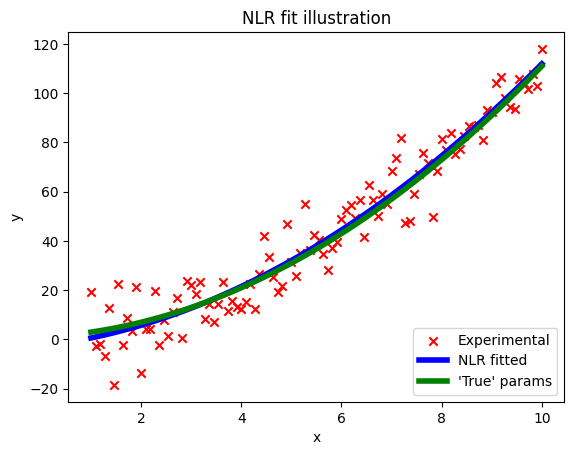

In [2]:
#%%
# Non-linear regression.
nlr = NonLinearRegression(model, p0_length=3, fit_intercept=True)

nlr.fit(X_expt, y_expt)

# Predict y from the model.
y_pred = nlr.predict(X_expt)

# Also, predict the y that would have resulted from the true params.
# NOTE: The nlr.predict method takes 'params' as an optional argument.
# This means that if you wish to obtain predictions for a different set of params,
# this can be done. This exactly the same as getting these from the model directly.
# And it is a different functionality from scikit-learn.
y_true_pred = nlr.predict(X_expt, params=true_params)

# Show the parameters.
# Compare known parameters with fitted parameters.
df_param = pd.DataFrame()
df_param["experimental"] = true_params
df_param["nlr_fitted"] = nlr.coef_

print(df_param)

# Plot the results.
plt.figure()
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.title("NLR fit illustration")

# Showing experimental points and predicted points.
plt.scatter(X_expt, y_expt, marker="x", color="red", zorder=0.5, label="Experimental")
plt.plot(X_expt, y_pred, lw=4, color="blue", zorder=0.8, label="NLR fitted")
plt.plot(X_expt, y_true_pred, lw=4, color="green", zorder=0.9, label="'True' params")

plt.legend(loc="lower right")


   experimental  nlr_fitted   nlr_std  lower_bound_90%_conf  \
0           1.0   -2.754529  3.964091             -9.337754   
1           1.0    2.468625  1.627644             -0.234427   
2           1.0    0.899907  0.144711              0.659584   

   upper_bound_90%_conf  
0              3.828695  
1              5.171677  
2              1.140231  


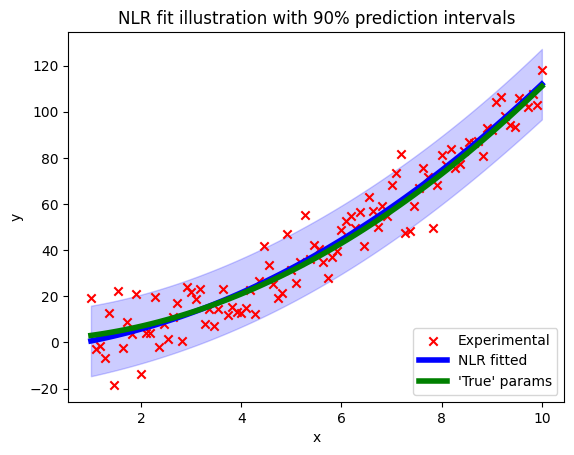

In [3]:
#%%
# Model inference
inf = ParametricModelInference()

inf.set_up_model_inference(X_train=X_expt, y_train=y_expt, estimator=nlr)

# Get prediction intervals on the features.
df_feature_imp = inf.get_parameter_errors()

# Getting prediction intervals for X_expt values.
df_int = inf.get_intervals(X_expt)

# Look at the parameter errors for these.
df_param["nlr_fitted"] = df_feature_imp["mean"].values
df_param["nlr_std"] = df_feature_imp["std"].values
df_param["lower_bound_90%_conf"] = df_feature_imp["lower_bound"].values
df_param["upper_bound_90%_conf"] = df_feature_imp["upper_bound"].values

print(df_param)

# Plot the prediction intervals.
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("NLR fit illustration with 90% prediction intervals")

# Showing experimental points and predicted points.
plt.scatter(X_expt, y_expt, marker="x", color="red", zorder=0.5, label="Experimental")
plt.plot(X_expt, y_pred, lw=4, color="blue", zorder=0.8, label="NLR fitted")
plt.plot(X_expt, y_true_pred, lw=4, color="green", zorder=0.9, label="'True' params")

plt.fill_between(
    X_expt[:, 0],
    df_int["lower_bound"],
    df_int["upper_bound"],
    color="blue",
    alpha=0.2,
    zorder=0,
)

plt.legend(loc="lower right")
